In [ ]:
import pandas as pd
import json

with open('molecules.json') as f:
   data = json.load(f)
print (data)

#pdObj = pd.read_json('molecules.json', orient='index')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import csv

file = open('molecule.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
for row in csvreader:
        rows.append(row)
rows

# **Entendendo a Regressão de maneira matemática.**
Para os cientistas de dados que trabalham com modelos de regressão é bastante comum realizar testes com modelos lineares. Embora utilizando de linguagens de programação especializadas em aprendizado de máquina (Python, R, Julia), onde o valor da regressão é obtido pela execução do comando fit(), você sabe o que acontece por detrás dos panos para o algoritmo retornar aquela expressão bonita?

-- Mas Yuri, vem cá, não é só minimizar os erros da expressão linear no seu conjunto de dados?

-- É exatamente isso, de maneira simplificada, porém a matemática por detrás dos cálculos é bastante interessante.

-- Interessante, gostaria de entender então.

-- Então vamos começar.

===============================================================================

A regressão linear (LR) é umas das técnicas mais simples do conjunto de ferramentas do aprendizado de máquina, bastante utilizada sem conhecimento ao usar o comando Linha de Tendência do Excel.

A LR é a criação de um modelo que explica um dataset buscando a melhor linha, chamaremos aqui de função hipótese (*fh* ou *y*), que descreve aquele conjunto de dados. Portanto, o objetivo desta técnica é tentar encontrar uma expressão linear que descreva todos os dados do dataset minimize a soma dos erros (método dos mínimos quadrados), sendo este o mais usado para este tipo de análise. Contudo, outras aproximações podem ser utilizadas, como a aproximação por máximo verosemelhança (MLE), mínimo desvio absoluto, entre outras.

De uma maneira matemática, a expressão genérica para a função hipótese linear é dada por:

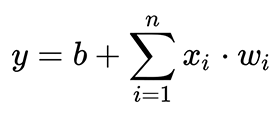

sendo *xi* o valor do dado na característica (feature) X do i-ésimo dado do dataset, *b* o coeficiente linear ou intercepto, *wi* é o peso estatístico do i-ésimo dado do dataset da característica X e *n* o total de dados contidos no dataset.





# **1. Loading the libraries needed to run this application**

In [ ]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import math
np.random.seed(42)


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (cm2inch(8.5,4.25))
matplotlib.rcParams['grid.color'] = 'k'
matplotlib.rcParams['axes.linewidth'] = 10 #set the value globally
import matplotlib.style as style

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import statsmodels.api as sm
from scipy import stats

# Splitting data into training/testing
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **2. Loading the data and first analysis**
Features:


*   P = Paraffinic fraction for Oil
*   N = Naphtenic fraction for Oil
*   A = Aromatic Fraction for Oil
*   DensityOil = Density for Oil in g/cm^3
*   Salinity = Salt concentration for brine in %wt
*   Na, K, Ca, Mg, Cl, SO4 = Specific Sodium, Potassium, Calcium, Magnesium, Chlorine and Sulfate Ion concentration for brine in %wt
*   IFT = Interfacial tension in mN/m between Oil and Brine. Also is our target variable (y)



In [ ]:
# Loading the dataset
df_train = pd.read_csv("dataset-yuri-new-7.csv", delimiter=";")
df_train.head()

,P,N,A,DensityOil,Salinity,Na,K,Ca,Mg,Cl,SO4,IFT
0,100.0,0.0,0.0,0.684,1.0,0.0,0.000000,0.003623,0.0,0.006417,0.0,52.365135
1,100.0,0.0,0.0,0.684,3.5,0.0,0.000000,0.012246,0.0,0.021695,0.0,51.956841
2,100.0,0.0,0.0,0.684,5.0,0.0,0.000000,0.017295,0.0,0.030638,0.0,52.675557
3,100.0,0.0,0.0,0.684,1.0,0.0,0.005199,0.000000,0.0,0.004720,0.0,51.308806
4,100.0,0.0,0.0,0.684,3.5,0.0,0.018383,0.000000,0.0,0.016691,0.0,52.359999


In [ ]:
# Show dataframe columns
df_train.columns

NameError: ignored

In [ ]:
#Describe of features
df_train.describe()

,P,N,A,DensityOil,Salinity,Na,K,Ca,Mg,Cl,SO4,IFT
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,56.192482,4.971479,38.836040,0.795600,3.133633,0.003444,0.003552,0.002362,0.001746,0.010553,0.009865,47.638738
std,32.725308,8.183856,34.729088,0.064491,1.572052,0.005943,0.007552,0.004969,0.003531,0.012202,0.013103,3.790439
min,0.000000,0.000000,0.000000,0.684000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.107735
25%,50.000000,0.000000,17.120000,0.775500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.894079
50%,61.880000,0.000000,27.060199,0.805000,3.500000,0.000000,0.000000,0.000000,0.000000,0.005411,0.001280,48.935254
75%,69.082408,3.857393,50.000000,0.846500,5.000000,0.003949,0.000394,0.000404,0.001305,0.021695,0.023058,50.542605
max,100.000000,21.000000,100.000000,0.867000,5.000000,0.019673,0.026244,0.017295,0.012765,0.037296,0.038961,53.391183


In [ ]:
# Describe our target feature
df_train['IFT'].describe()

count    130.000000
mean      47.638738
std        3.790439
min       40.107735
25%       44.894079
50%       48.935254
75%       50.542605
max       53.391183
Name: IFT, dtype: float64

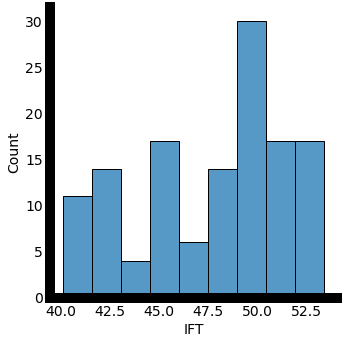

In [ ]:
# Target feature distribution
sns.displot(df_train['IFT']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

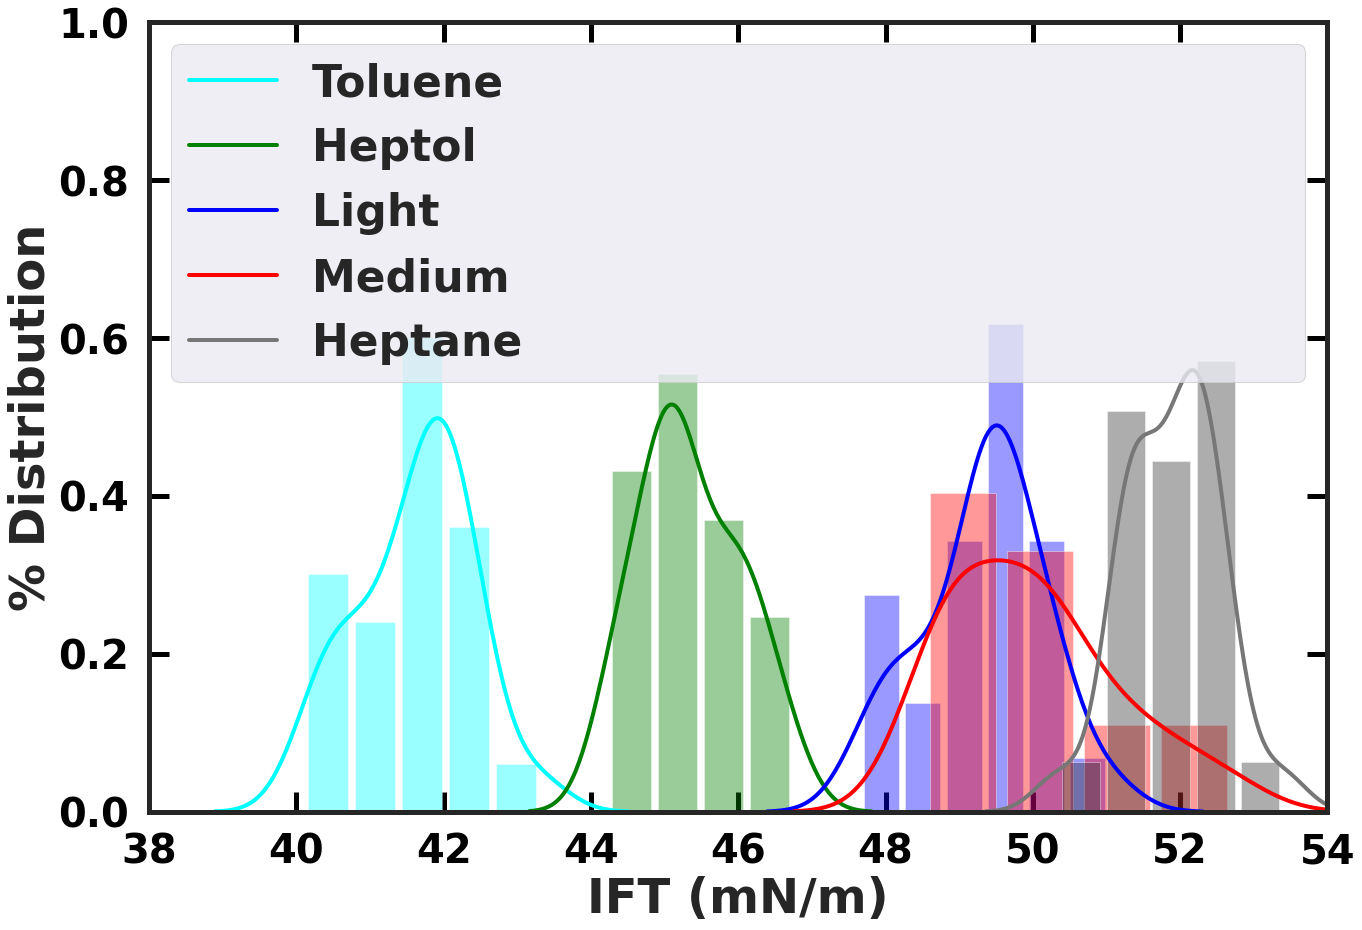

In [ ]:
# We have 5 different oil models, so lets analyze if we can get any information about the distribution of IFT values for each oil

heptane = pd.read_csv("heptane.dat", delimiter=";")
medium = pd.read_csv("medium.dat", delimiter=";")
light = pd.read_csv("light.dat", delimiter=";")
toluene = pd.read_csv("toluene.dat", delimiter=";")
heptol = pd.read_csv("heptol.dat", delimiter=";")
sns.set(style="white")
sns.set_context("paper", rc={"font.size":40,"font":"Helvetica","axes.fontweight":'bold',"axes.titlesize":8,"axes.labelsize":5,"xlabel.size":20,'xtick.labelsize': 20, 'ytick.labelsize': 20})
sns_plot, ax = plt.subplots()
plt.ylim(0, 1)
plt.xlim(38,54,5)
sns_plot.set_size_inches(20, 14.0)
sns.set(font_scale=4)
plt.setp(ax.spines.values(), linewidth=5)
#sns_plot = sns.distplot(medium['IFT'],kde_kws={"label": "Medium","lw": 3});
sns.distplot(toluene['IFT'],hist_kws={"color":"cyan","rwidth":0.85},kde_kws={"color":"cyan","label": "Toluene","lw": 4});
sns.distplot(heptol['IFT'],hist_kws={"color":"green","rwidth":0.85},kde_kws={"color":"green","label": "Heptol","lw": 4});
sns.distplot(light['IFT'],hist_kws={"color":"blue","rwidth":0.85},kde_kws={"color":"blue","label": "Light","lw": 4});
sns.distplot(medium['IFT'],hist_kws={"color":"red","rwidth":0.85},kde_kws={"color":"red","label": "Medium","lw": 4,});
sns.distplot(heptane['IFT'],hist_kws={"color":"#333333","rwidth":0.85},kde_kws={"color":"#777777","label": "Heptane","lw": 4});
plt.xlabel("IFT (mN/m)",fontsize=48,fontweight='bold')
plt.ylabel("% Distribution",fontsize=48,fontweight='bold')
legend_properties = {'weight':'bold'}
ax.xaxis.grid(True, which='minor')
plt.xticks(fontsize=40,fontweight='bold')
plt.yticks(fontsize=40,fontweight='bold')
plt.legend(fontsize=20,prop=legend_properties,mode="expand")
#sns_plot.legend(loc=9, bbox_to_anchor=(1.25, 1))

sns_plot = sns_plot.get_figure()
plt.tight_layout()
ax.tick_params(direction='in', length=20, width=5, colors='black',pad=20,bottom=True,left=True,top=True,right=True)
plt.savefig('Teste.pdf',dpi=720)

**2.1 First Observation**

Each different oil has a specific range of IFT values. So, we can see toluene has the lower values, opposite behavior of heptane that have higher IFT values.

**2.2 Correlation and Heatmap from entire dataset**

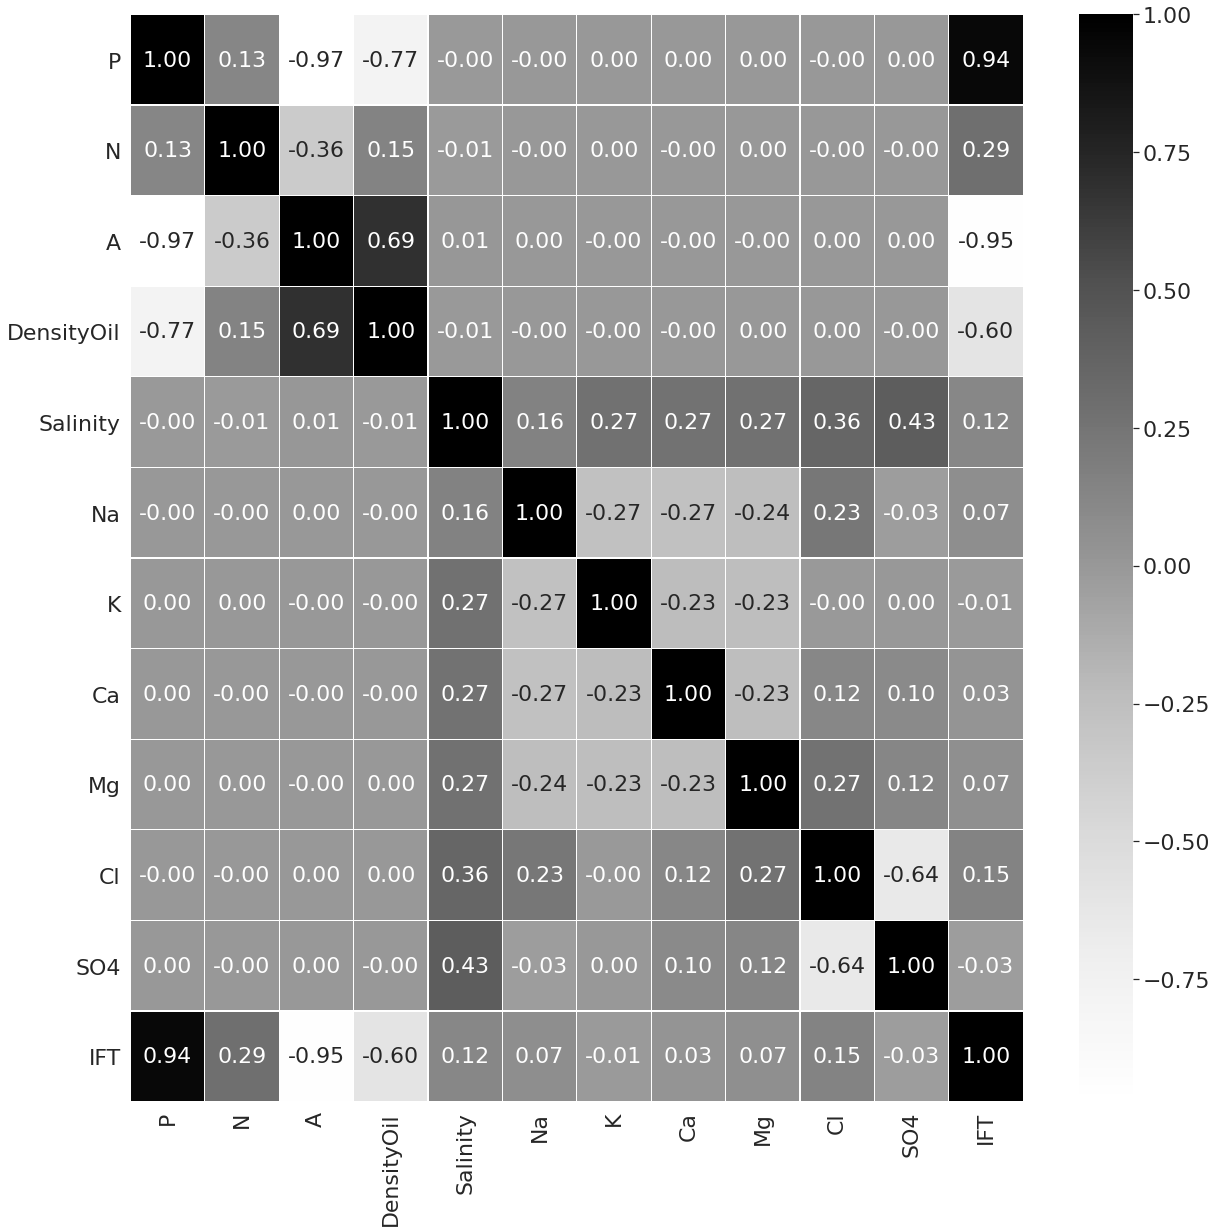

In [ ]:
# Define the correlation matriz
corrmat = df_train.corr()
# Set the heatmap figure
plt.figure(figsize=(20,20))
# Set number of variable for heatmap
k = 20
# Define column names for each variable
cols = corrmat.index # Dataset order
#cols = corrmat.nlargest(k, 'IFT')['IFT'].index # Highest to lowest order

# Calculating the correlation
cm = np.corrcoef(df_train[cols].values.T)
# Plotting the heatmap
sns.set(font_scale=2)
hm = sns.heatmap(cm, linewidths=.2, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 22}, yticklabels=cols.values, xticklabels=cols.values, cmap="Greys")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

**2.3 Second Observation**

In [ ]:
from scipy.stats import bartlett
stats, pvalue = bartlett(
    df_train['A'], df_train['Ca'], df_train['Cl'],
    df_train['DensityOil'], df_train['K'],df_train['SO4'],
    df_train['K'], df_train['Mg'], df_train['N'],
    df_train['Na'], df_train['P'], df_train['Salinity'],

)

print('Stats')
print(stats)

print('p-value')
print(pvalue)

Stats
15281.009312822915
p-value
0.0


In [ ]:
from sklearn.decomposition import PCA

df_pca = df_train.drop(['IFT'], 1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_std = std.fit_transform(df_train)

pca = PCA()
pca.fit(df_std)
autovalores = pca.explained_variance_
autovetores = pca.components_

import numpy as np

print('Autovalores')
print(autovalores)

print('Autovetores')
print(autovetores)




Autovalores
[3.56000305e+00 1.73470321e+00 1.62845863e+00 1.25312244e+00
 1.23664105e+00 1.20152585e+00 1.15125596e+00 2.90406762e-01
 1.98930141e-02 1.69217501e-02 9.15445425e-05 2.00572582e-32]
Autovetores
[[-5.22934561e-01 -1.33385962e-01  5.24194759e-01  4.13968327e-01
  -2.86636058e-02 -1.84092014e-02  3.41908452e-03 -6.37381212e-03
  -1.84926322e-02 -4.00287001e-02  1.01385647e-02 -5.09252224e-01]
 [-4.96184864e-02 -4.61714276e-04  4.68644280e-02  5.26445745e-02
   7.06247239e-02  2.85890918e-01 -1.19434391e-01 -5.09021728e-02
   1.58425211e-01  7.15706220e-01 -5.90557033e-01  5.38650451e-02]
 [-4.01282126e-02 -1.71677739e-02  4.18584759e-02  3.45956509e-02
   7.39152791e-01 -4.73327191e-02  9.97209253e-02  2.63906390e-01
   3.90022285e-01  2.17995075e-01  4.05845448e-01  5.11679587e-02]
 [ 9.62691838e-03 -2.77703090e-02 -2.52743943e-03 -2.25022600e-02
   6.73985041e-02 -5.02242445e-01  7.21228948e-01  1.87063667e-01
  -2.80663162e-01  1.54346976e-01 -2.89600902e-01 -1.43480685e-

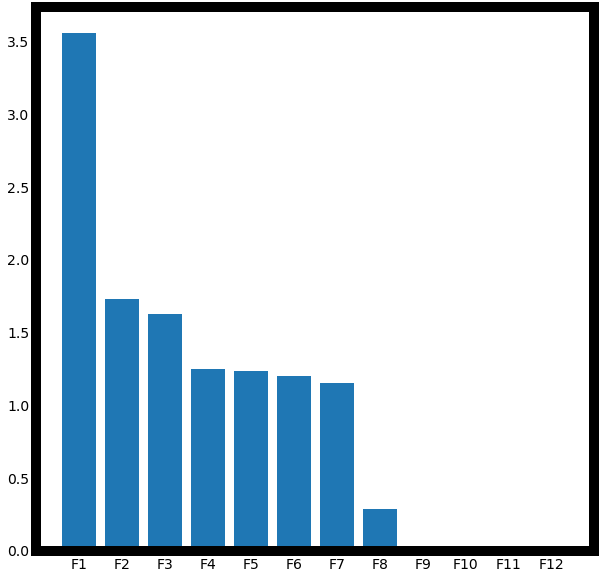

In [ ]:
fatores_x = ['F1','F2','F3', 'F4','F5','F6', 'F7','F8','F9', 'F10', 'F11', 'F12']
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.bar(x=fatores_x, height= autovalores)
plt.show()

In [ ]:
dados_fatores = pca.fit_transform(dados_std)

df_pca_new = pd.DataFrame(dados_fatores)
df_pca_new.columns = fatores_x
df_pca_new.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
0,-2.504768,-0.237940,-1.620357,0.266898,0.637670,-0.712838,-1.179783,-0.067023,0.309949,-0.060859,0.001977,-3.381399e-16
1,-2.556876,0.679860,0.287887,0.895945,2.099637,-0.494285,-1.194181,-0.242076,0.035392,-0.018866,-0.001162,1.368968e-15
2,-2.717218,1.232447,1.435177,1.262118,2.955785,-0.356202,-1.176631,-0.238348,0.051740,-0.053079,-0.001375,-1.917659e-17
3,-2.349682,-0.398228,-1.789332,0.610853,-0.246755,-0.418361,-1.175558,-0.170930,0.127350,-0.026863,0.000226,5.280330e-17
4,-2.570647,0.225042,-0.205640,2.130391,-0.927757,0.548001,-1.068153,-0.149393,0.182583,-0.034633,0.000497,3.338561e-17


In [ ]:
dados_cargas = pd.DataFrame(df_std.copy())
dados_cargas['F1'] = df_pca_new['F1']
dados_cargas['F2'] = df_pca_new['F2']
dados_cargas['F3'] = df_pca_new['F3']
dados_cargas['F4'] = df_pca_new['F4']
dados_cargas['F5'] = df_pca_new['F5']
dados_cargas['F6'] = df_pca_new['F6']
dados_cargas['F7'] = df_pca_new['F7']

print(dados_cargas.corr().iloc[0:12,12:19])

          F1        F2        F3        F4        F5        F6        F7
0  -0.982869 -0.065100 -0.051011  0.010735 -0.001722 -0.006267 -0.100658
1  -0.250702 -0.000606 -0.021824 -0.030967  0.000875 -0.052175  0.939054
2   0.985238  0.061486  0.053210 -0.002818  0.001417  0.018201 -0.126437
3   0.778064  0.069070  0.043978 -0.025093  0.002349 -0.013071  0.466388
4  -0.053874  0.092660  0.939606  0.075157 -0.016992  0.304703  0.004923
5  -0.034601  0.375091 -0.060169 -0.560058 -0.010085  0.734489  0.009031
6   0.006426 -0.156699  0.126765  0.804254 -0.446055  0.330021  0.051090
7  -0.011980 -0.066784  0.335476  0.208598  0.906052 -0.131032  0.002906
8  -0.034757  0.207855  0.495794 -0.312972 -0.448894 -0.638400 -0.043635
9  -0.075235  0.939011  0.277114  0.172115  0.054445 -0.014177 -0.013146
10  0.019056 -0.774814  0.515908 -0.322939 -0.048504  0.150392  0.015949
11 -0.957153  0.070671  0.065044 -0.016000  0.002949  0.015657  0.109017


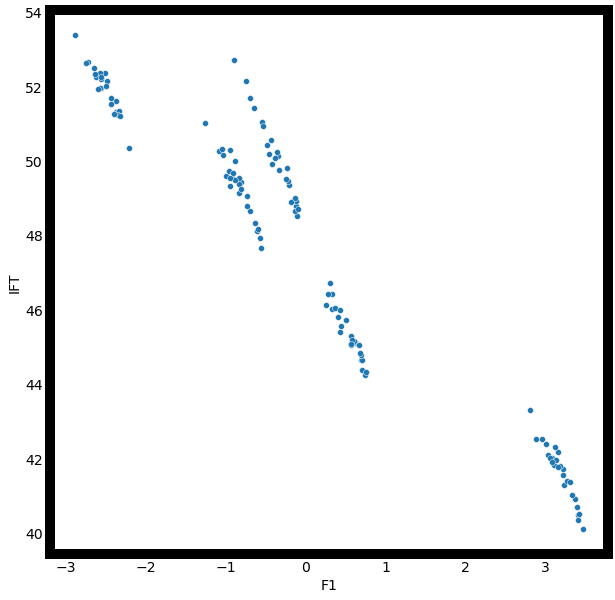

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
sns.scatterplot(x=df_pca_new['F1'],y = y)

MSE
1.4686829550969
Score
0.8414816725214805


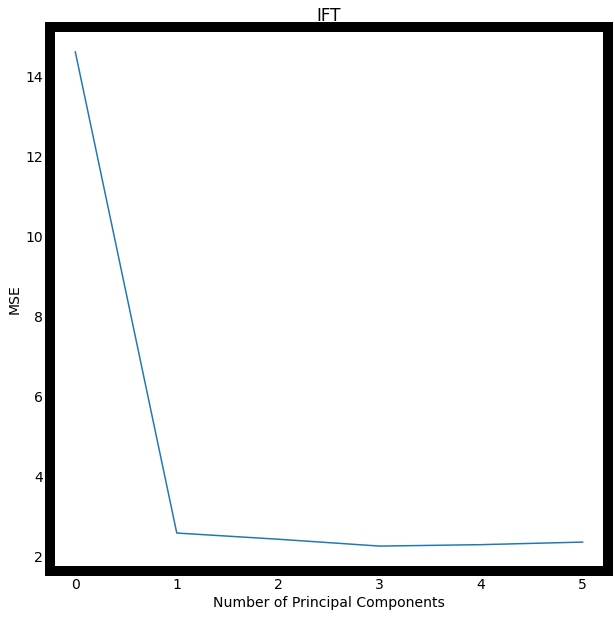

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#define predictor and response variables
X = df_train[['P', 'N', 'A', 'DensityOil', 'Salinity', 'Na', 'K', 'Ca', 'Mg', 'Cl',
       'SO4']]
y = df_train[['IFT']]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

# Plot cross-validation results
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('IFT')

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:3]

#train PCR model on training data
regr = LinearRegression()
regr.fit(X_reduced_train[:,:3], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)

# Print MSE
print('MSE')
print(np.sqrt(mean_squared_error(y_test, pred)))

# Print Score
print('Score')
print(regr.score(X = X_reduced_test, y = y_test))

In [ ]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#LOAD DATA
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data=pd.read_csv(url)

#view first six rows of dataset
data[0:6]

#find total observations in dataset
len(data.index)

#FIT LOGISTIC REGRESSION MODEL
X = df_train[['P', 'N', 'A', 'DensityOil', 'Salinity', 'Na', 'K', 'Ca', 'Mg', 'Cl',
       'SO4']]
y = df_train['IFT']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: ignored

**3 Statistical Analysis**

Aqui colocar os aprendizados das aulas do MBA

**3.1 Let's create the train and test dataset**

In [ ]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are final grade of student
    labels = df['IFT']

    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)

    # Find correlations with the Grade
    most_correlated = df.corr().abs()['IFT'].sort_values(ascending=False)

    # Maintain the top 5 most correlation features with Grade
    most_correlated = most_correlated[:17]

    df = df.loc[:, most_correlated.index]
    #df = df.drop(columns = 'higher_no')

    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels,
                                                        test_size = 0.25,
                                                        random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = format_data(df_train)
X_train.head()

,IFT,A,P,DensityOil,N,Cl,Salinity,Na,Mg,SO4,Ca,K
24,52.353087,0.000000,100.000000,0.6840,0.000000,0.022051,3.5,0.011111,0.001305,0.000000,0.000404,0.000394
67,48.178602,17.120000,61.880000,0.8050,21.000000,0.000000,1.0,0.000000,0.000000,0.005294,0.000000,0.004313
113,41.408181,100.000000,0.000000,0.8670,0.000000,0.006101,1.0,0.003949,0.000000,0.000000,0.000000,0.000000
89,52.149093,27.060199,69.082408,0.8465,3.857393,0.030391,2.5,0.019673,0.000000,0.000000,0.000000,0.000000
15,51.355495,0.000000,100.000000,0.6840,0.000000,0.000000,1.0,0.000000,0.000000,0.005294,0.000000,0.004313


**3.2 Analysis of simplest model - Linear Regression**

In [ ]:
# Removing target feature from train and test dataset
#X_train = X_train.drop(['IFT'],axis=1)
#X_test = X_test.drop(['IFT'],axis=1)

method = LinearRegression(normalize=True)
model = method.fit(X_train, y_train)

print ("Beta Array")
print(model.coef_)

print ("Alpha")
print(model.intercept_)

Beta Array
[-6.02196735e-02  6.92556064e-02  1.49335318e+01 -1.05234686e-02
 -3.89231853e+02  1.20702989e-01  6.92611438e+02  1.27728693e+03
 -3.08003255e+02  7.62130862e+02  3.86754875e+02]
Alpha
33.260330987651365


**3.3 Checking if the model is valid with several statistics methods**

In [ ]:
#Target Feature
y = df_train['IFT']
# Removing target feature from dataset
df_wo_ift = df_train.drop(['IFT'],axis=1)

# Calculating statistics
X2 = sm.add_constant(df_wo_ift)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IFT   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     334.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.95e-82
Time:                        18:20:12   Log-Likelihood:                -138.01
No. Observations:                 130   AIC:                             298.0
Df Residuals:                     119   BIC:                             329.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.000     21.703      0.0

**3.3.1 Statistic Result Analysis**
In a general approach we are looking for features that have p-value lesser than or equal to 0.05. Which means thar if p-value is lower than 0.05 you can reject the null hypothesis. Let's analyze our summary

As we can see, only alpha, P, N, A and Density Oil have p-values lower than 0.05, so in first approach we can exclude the other features. So, let's do this using a stepwise approach

In [ ]:
# Dropped Salinity
df_wo_salinity = df_wo_ift.drop( ['Salinity'], 1)
# Calculating statistics
X2 = sm.add_constant(df_wo_salinity)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                    IFT   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     373.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.45e-83
Time:                        18:11:00   Log-Likelihood:                -138.24
No. Observations:                 130   AIC:                             296.5
Df Residuals:                     120   BIC:                             325.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.000     21.830      0.0

In [ ]:
# Dropped Salinity and Na
df_wo_salinity = df_wo_ift.drop( ['Salinity', 'Na'], 1)
# Calculating statistics
X2 = sm.add_constant(df_wo_salinity)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IFT   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     415.6
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.66e-84
Time:                        18:11:45   Log-Likelihood:                -139.48
No. Observations:                 130   AIC:                             297.0
Df Residuals:                     121   BIC:                             322.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.000     21.668      0.0

In [ ]:
# Dropped Salinity, Na and K
df_wo_salinity = df_wo_ift.drop( ['Salinity', 'Na', 'K'], 1)
# Calculating statistics
X2 = sm.add_constant(df_wo_salinity)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IFT   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     472.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.44e-85
Time:                        18:12:31   Log-Likelihood:                -140.29
No. Observations:                 130   AIC:                             296.6
Df Residuals:                     122   BIC:                             319.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.000     21.609      0.0

In [ ]:
# Dropped Salinity, Na, K and Ca
df_wo_salinity = df_wo_ift.drop( ['Salinity', 'Na', 'K', 'Ca'], 1)
# Calculating statistics
X2 = sm.add_constant(df_wo_salinity)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IFT   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     552.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.16e-86
Time:                        18:13:01   Log-Likelihood:                -140.75
No. Observations:                 130   AIC:                             295.5
Df Residuals:                     123   BIC:                             315.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.000     21.631      0.0

In [ ]:
# Dropped Salinity, Na, K, Ca and Mg
df_wo_salinity = df_wo_ift.drop( ['Salinity', 'Na', 'K', 'Ca', 'Mg'], 1)
# Calculating statistics
X2 = sm.add_constant(df_wo_salinity)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IFT   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     666.9
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           8.60e-88
Time:                        18:13:24   Log-Likelihood:                -140.84
No. Observations:                 130   AIC:                             293.7
Df Residuals:                     124   BIC:                             310.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.000     21.716      0.0

**3.3.1.1 Result after Stepwise approach**

We already ran the stepwise methodology, so it's possible see that we have 5 different features that fills the alternative hypothesis (p-value <= 0.05) at 95% confidence. So, Let's redo the linear model using this set of features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_wo_salinity, y,
                                                        test_size = 0.25,
                                                        random_state=42)

method = LinearRegression(normalize=True)
model = method.fit(X_train, y_train)

print ("Beta Array")
print(model.coef_)

print ("Alpha")
print(model.intercept_)

print('==========')
print('Using the whole dataset')
print('==========')
print("Beta Array\n[-6.02196735e-02  6.92556064e-02  1.49335318e+01 -1.05234686e-02\n -3.89231853e+02  1.20702989e-01  6.92611438e+02  1.27728693e+03\n -3.08003255e+02  7.62130862e+02  3.86754875e+02]\nAlpha\n33.260330987651365")

Beta Array
[ 6.95464525e-02 -9.82364129e-03 -6.05132031e-02  1.52646217e+01
  6.41336148e+01  3.16813400e+01]
Alpha
33.01669355866211
Using the whole dataset
Beta Array
[-6.02196735e-02  6.92556064e-02  1.49335318e+01 -1.05234686e-02
 -3.89231853e+02  1.20702989e-01  6.92611438e+02  1.27728693e+03
 -3.08003255e+02  7.62130862e+02  3.86754875e+02]
Alpha
33.260330987651365


In [ ]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

# Naive baseline is the median
median_pred = X_train['IFT'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['IFT']

# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 2.7226
Median Baseline RMSE: 3.4527


------------------
Linear Regression
------------------
Score: 0.9718    |
------------------
Score: 0.9385    |
ElasticNet
------------------
Score: 0.9709    |
------------------
Score: 0.9385    |
Random Forest
------------------
Score: 0.9969    |
------------------
Score: 0.9653    |
Extra Trees
------------------
Score: 1.0000    |
------------------
Score: 0.9571    |
Gradient Boosted
------------------
Score: 0.9728    |
------------------
Score: 0.9447    |


C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


                        mae      rmse
Linear Regression  0.696258  0.812163
ElasticNet         0.693115  0.812006
Random Forest      0.505937  0.609767
Extra Trees         0.52955  0.678119
Gradient Boosted   0.659894  0.770213
Baseline            2.72257   3.45275


C:\Users\yuri\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


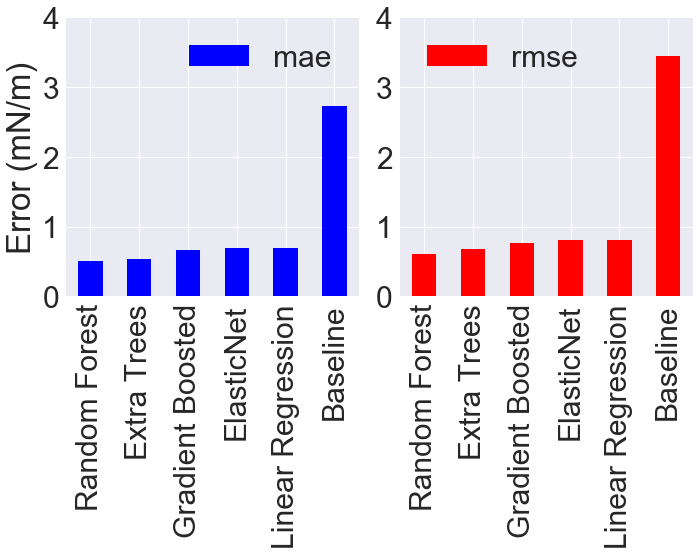

In [ ]:
#sns.set(font_scale=2)
def model_predict(X_data,target,salinity,model):
    print("Salinity: {:.4f} | Target: {:.4f}".format(salinity,target),model.predict(X_data),(1-(model.predict(X_data)/target))*100)

# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet',
                      'Random Forest', 'Extra Trees',
                       'Gradient Boosted', 'Baseline']

    # Instantiate the models
    model1 = LinearRegression(normalize='true')
    model2 = ElasticNet(alpha=0.0001, l1_ratio=0,normalize='true')
    #model2 = Lasso(alpha=1e-5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    #model5 = SVR(kernel='rbf', degree=3, C=1e3, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    print('------------------')
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    X_train = X_train.drop(['IFT'],axis=1)
    X_test = X_test.drop(['IFT'],axis=1)
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        #print(X_test)
        print(model_name_list[i])
        print('------------------')
        #model_predict([[61.8800,0.8050,17.1200,21.0000,0.50,0.0,0.0,0.0,0.0,0.0,0.0]],51,0.0,model)
        #model_predict([[61.8800,0.8050,17.1200,21.0000,0.50,0.0009823871,0.0,0.0,0.0015176129,0.0,0.0]],52,0.25,model)
        #model_predict([[61.8800,0.8050,17.1200,21.0000,0.50,0.0019647743,0.0,0.0,0.0030352257,0.0,0.0]],52,0.5,model)
        #model_predict([[61.8800,0.8050,17.1200,21.0000,0.50,0.0039295486,0.0,0.0,0.0060704514,0.0,0.0]],54,1.0,model)

        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        score = model.score(X_train,y_train)
        print("Score: {:.4f}    |".format(score))
        print('------------------')
        # Insert results into the dataframe
        score = model.score(X_test,y_test)
        print("Score: {:.4f}    |".format(score))
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_mae_s = model.score(X_train,y_train)

    #

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    #print(model1.coef_)
    #print(score)
    return results

results = evaluate(X_train, X_test, y_train, y_test)

figsize(10, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax,legend=None)
plt.ylabel('Error (mN/m)');
plt.ylim(0,4,1)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax,legend=None)
#plt.ylabel('Erro (mN/m)');
plt.ylim(0,4,1)

plt.tight_layout()

plt.savefig('Teste-2.pdf',dpi=300)

print (results)

figsize(10, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
#plt.title('Erro Médio Absoluto');
plt.ylabel('Error (mN/m)');
plt.ylim(0,4)
# Median absolute percentage error
ax = plt.subplot(1, 2, 2)

results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
#plt.title('Raiz Quadrada do erro quadrático médio');
plt.ylim(0,4)
plt.tight_layout()

plt.savefig('class-errors.pdf',dpi=720)

#print('The Linear Regression regressor is {:0.2f}% better than the baseline.'.format(
#    (100 * abs(results.loc['Linear Regression', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

[ 9 19 29 38 48 58 67 72]
[-0.0012906144879235417, -0.0021015206294770243, -0.0024975533868770538, -0.0049911463767055592, -0.0064175315861417902, -0.0097106761453476173, -0.011940870366348555, -0.013679352463684078]
[-1.3489145678517327, -0.016134744444175127, -0.0050728183860523843, -0.0078527173888557067, -0.0094333200702975909, -0.014109154304246446, -0.017120904290636896, -0.019207710854376964]


AttributeError: 'NoneType' object has no attribute 'get_figure'

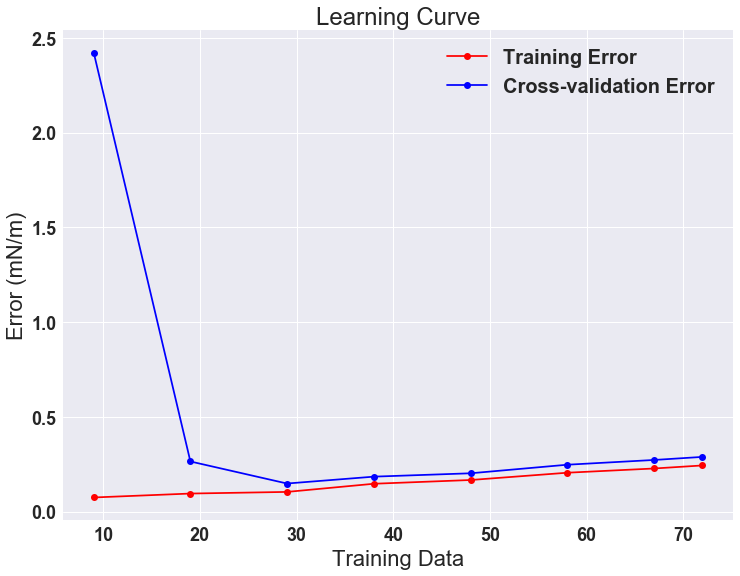

In [ ]:
#sns.set(font_scale=2)
#X_train = X_train.drop(['IFT'],axis=1)
#df_train = df_train.drop(['IFT'],axis=1)
#y = df_train['IFT']
m = len(y_train)
#df_train = df_train.drop(['IFT'],axis=1)
model = ElasticNet(alpha=0.0001, l1_ratio=0,normalize='true')
#model = LinearRegression()
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, scoring='neg_mean_squared_error', train_sizes=[ int(0.1*m), int(0.2*m), int(0.3*m), int(0.4*m), int(0.5*m), int(0.6*m), int(0.7*m), int(0.75*m)] , cv=5)
print (train_sizes)
tsc = [i.mean() for i in train_scores ]
print (tsc)
tsv = [i.mean() for i in valid_scores ]
print (tsv)
#print (valid_scores)

for i in range(len(tsc)):
    tsc[i] = (np.sqrt(tsc[i] * -1.0)/47.96)*100

for i in range(len(tsv)):
    tsv[i] = (np.sqrt(tsv[i] * -1.0)/47.96)*100

sns.set(style="white")
sns.set_context("paper", rc={"font.size":20,"font":"Helvetica","axes.fontweight":'bold',"axes.titlesize":8,"axes.labelsize":5,"xlabel.size":20,'xtick.labelsize': 20, 'ytick.labelsize': 20})
sns.set(font_scale=2)

plt.figure(figsize(12,9))
plt.title("Learning Curve")
plt.plot(train_sizes,tsc, 'o-', color="r", label="Training Error")
plt.plot(train_sizes,tsv, 'o-', color="b", label="Cross-validation Error")
plt.xlabel("Training Data")
plt.ylabel("Error (mN/m)")
plt.xticks(fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')
plt.legend(fontsize=18,prop=legend_properties)
#plt.ylim(0.9,1)
sns_plot = sns_plot.get_figure()
plt.tight_layout()
plt.legend()
plt.show()

          P         N         A  DensityOil  Salinity        Na         K  \
1 -0.600854 -0.127419  0.596212    0.516965  0.003908  0.000235  0.000469   
2  0.000021 -0.000158  0.000018   -0.000105  0.016794  0.286626 -0.126079   

         Ca        Mg        Cl       SO4  
1  0.000573  0.000368  0.000657  0.000816  
2 -0.069677  0.131954  0.701699 -0.622109  
Features by importance:
 [(22.074125884749982, 'P'), (21.90360142589114, 'A'), (18.99221885485493, 'DensityOil'), (4.681111012904518, 'N'), (0.14358630488416022, 'Salinity'), (0.06539597865544654, 'Cl'), (0.061657483431149046, 'SO4'), (0.026280668407314148, 'Na'), (0.021884381822825264, 'Ca'), (0.020396822377343336, 'K'), (0.017710997925452544, 'Mg')]


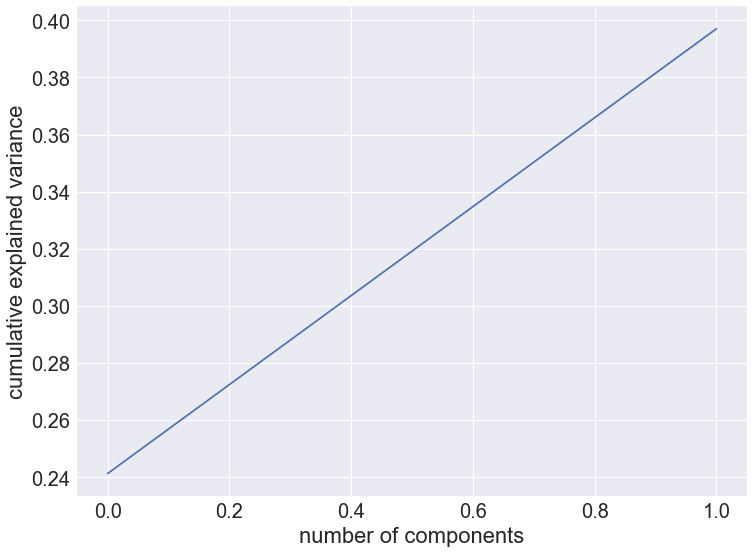

In [ ]:
from sklearn.decomposition import PCA
df_train = df_train.drop(["IFT"],axis=1)
#Normalizing
Data_Array = df_train
standard = StandardScaler()
Data_SArray = standard.fit_transform(Data_Array)
Data_Standard = pd.DataFrame(Data_SArray)

#PCA
model=PCA(n_components=2, svd_solver = 'full', whiten=True)
model.fit(Data_Standard)
Data_trans = model.transform(Data_Standard)

#model = PCA(n_components = 2, svd_solver = 'full')
#model.fit(df_train)

components = pd.DataFrame(model.components_, columns = df_train.columns, index=[1, 2])
print(components)
T = model.transform(df_train)
import math
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important"
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])
    #zvector = components_[2] * max(transformed_features[:,2])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(T, model.components_, df_train.columns.values)

plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
df_train_pca = df_train[['P','N','A', 'DensityOil']]
#X_train, X_test, y_train, y_test = format_data(df_train_pca)
model1 = LinearRegression(normalize='true')
#X_train = X_train.drop(['IFT'],axis=1)
#X_test = X_test.drop(['IFT'],axis=1)
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
score = model1.score(X_train,y_train)
print("Score: {:.4f}    |".format(score))
print('------------------')
# Insert results into the dataframe
score = model1.score(X_test,y_test)
print("Score: {:.4f}    |".format(score))




ValueError: shapes (33,11) and (12,) not aligned: 11 (dim 1) != 12 (dim 0)

C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\yuri\Anaconda3\lib\site-packages\sklearn\model_selection\_validatio

[ 9 19 29 38 48 58 67 72]
[-1.3463226115771937e-29, -1.4880407812168979e-29, 0.0, -2.4180662694774596e-29, -1.4515040656066616e-29, -1.3579288409873416e-29, -1.3714405707484096e-29, -5.6096775482383066e-30]
[-2.3835224656277814e-29, -1.7271901924838996e-29, 0.0, -2.6651873277866939e-29, -1.4269248205597754e-29, -1.527899016428065e-29, -1.6209015652541211e-29, -6.5633227314388184e-30]


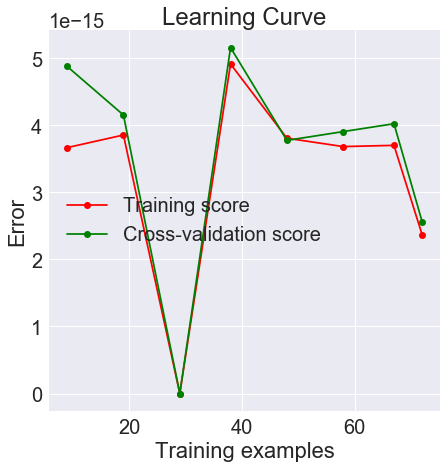

In [ ]:
m = len(y_train)
#df_train = df_train.drop(['IFT'],axis=1)
model = ElasticNet(alpha=0.0, l1_ratio=1,normalize='true')
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, scoring='neg_mean_squared_error', train_sizes=[ int(0.1*m), int(0.2*m), int(0.3*m), int(0.4*m), int(0.5*m), int(0.6*m), int(0.7*m), int(0.75*m)] , cv=5)
print (train_sizes)
tsc = [i.mean() for i in train_scores ]
print (tsc)
tsv = [i.mean() for i in valid_scores ]
print (tsv)
#print (valid_scores)

for i in range(len(tsc)):
    tsc[i] = np.sqrt(tsc[i] * -1.0)

for i in range(len(tsv)):
    tsv[i] = np.sqrt(tsv[i] * -1.0)

plt.figure(figsize(7,7))
plt.title("Learning Curve")
plt.plot(train_sizes,tsc, 'o-', color="r", label="Training score")
plt.plot(train_sizes,tsv, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Error")

#plt.ylim(0.9,1)
plt.legend()
plt.show()

In [ ]:
X_train = X_train.drop(['IFT'],axis=1)
X_train_lasso = X_train
#print(X_train)
lr = LinearRegression()
lr.fit(X_train_lasso, y_train)

print(lr.coef_)

ols_formula = 'IFT = %0.4f +' % lr.intercept_

for i, col in enumerate(X_train_lasso.columns[:]):
    ols_formula += ' %0.4f * %s +' % (lr.coef_[i], col)

' '.join(ols_formula.split(' ')[:-1])

[ -5.97239762e-02   6.97513037e-02   1.49335318e+01  -1.00277713e-02
  -3.89231853e+02   1.20702989e-01   6.92611438e+02   1.27728693e+03
  -3.08003255e+02   7.62130862e+02   3.86754875e+02]


'IFT = 33.2108 + -0.0597 * A + 0.0698 * P + 14.9335 * DensityOil + -0.0100 * N + -389.2319 * Cl + 0.1207 * Salinity + 692.6114 * Na + 1277.2869 * Mg + -308.0033 * SO4 + 762.1309 * Ca + 386.7549 * K'

In [ ]:
#X_train = X_train.drop(['IFT'],axis=1)
#X_train = X_train.drop(['label'],axis=1)
model4 = GradientBoostingRegressor(n_estimators=20)
model4.fit(X_train, y_train)
#print(X_train.head())
#scatter plot grlivarea/saleprice
model5 = RandomForestRegressor(n_estimators=50)
model5.fit(X_train, y_train)

cols = ["A", "P", "N", "Na", "DensityOil", "K", "SO4", "Ca", "Salinity", "Cl", "Mg"]
#tree.export_graphviz(model5,out_file="testetree.dot", feature_names=cols)
cols = ["P", "N", "A", "DensityOil", "Salinity", "Na", "K", "Ca", "Mg", "Cl", "SO4", "Average-HB"]
print(X_train.head())
#ols_formula = 'IFT = %0.5f +' % lr.intercept_
#for i, col in enumerate(X_train.columns[1:]):
#    ols_formula += ' %0.5f * %s +' % (lr.coef_[i], col)

#' '.join(ols_formula.split(' ')[:-1])
#print(model4.n_outputs_)
#print(model4.estimators_)
print(model4.feature_importances_,cols)
importances = model4.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model4.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
print(X_train.shape[1])
print(len(cols))
print(len(importances))
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

importances = model5.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model4.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
print(X_train.shape[1])
print(len(cols))
print(len(importances))
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

              A           P  DensityOil          N        Cl  Salinity  \
24     0.000000  100.000000      0.6840   0.000000  0.022051       3.5   
67    17.120000   61.880000      0.8050  21.000000  0.000000       1.0   
113  100.000000    0.000000      0.8670   0.000000  0.006101       1.0   
89    27.060199   69.082408      0.8465   3.857393  0.030391       2.5   
15     0.000000  100.000000      0.6840   0.000000  0.000000       1.0   

           Na        Mg       SO4        Ca         K  
24   0.011111  0.001305  0.000000  0.000404  0.000394  
67   0.000000  0.000000  0.005294  0.000000  0.004313  
113  0.003949  0.000000  0.000000  0.000000  0.000000  
89   0.019673  0.000000  0.000000  0.000000  0.000000  
15   0.000000  0.000000  0.005294  0.000000  0.004313  
[ 0.47055439  0.42094824  0.03596413  0.02059429  0.029783    0.01192443
  0.00354844  0.00318933  0.          0.          0.00349375] ['P', 'N', 'A', 'DensityOil', 'Salinity', 'Na', 'K', 'Ca', 'Mg', 'Cl', 'SO4', 'Avera

In [ ]:
#X_train = X_train.drop(['IFT'],axis=1)
X_train_lasso = X_train[['P','N','A','DensityOil']]
#print(X_train)
lr = LinearRegression()
lr.fit(X_train_lasso, y_train)

print(lr.coef_)

ols_formula = 'IFT = %0.4f +' % lr.intercept_

for i, col in enumerate(X_train_lasso.columns[:]):
    ols_formula += ' %0.4f * %s +' % (lr.coef_[i], col)

' '.join(ols_formula.split(' ')[:-1])

[  0.07822683  -0.02173692  -0.05648991  18.13668499]


'IFT = 31.1784 + 0.0782 * P + -0.0217 * N + -0.0565 * A + 18.1367 * DensityOil'

In [ ]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Grade ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Grade ~ N + DensityOil + Salinity + Cl + A + Ca + Mg + K + Na + SO4'